In [58]:
code2idx={'c4':0,'d4':1,'e4':2,'f4':3,'g4':4,'a4':5,'b4':6,
          'c8':7,'d8':8,'e8':9,'f8':10,'g8':11,'a8':12,'b8':13}
idx2code={0:'c4',1:'d4',2:'e4',3:'f4',4:'g4',5:'a4',6:'b4',
          7:'c8',8:'d8',9:'e8',10:'f8',11:'g8',12:'a8',13:'b8'}

In [59]:
import numpy as np
def seq2dataset(seq, window_size):
    dataset=[]
    for i in range(len(seq)-window_size):
        subset=seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [60]:
seq=['g8','e8','e4','f8','d8','d4','c8','d8','e8','f8','g8','g8','g4',
    'g8','e8','e8','e8','f8','d8','d4','c8','e8','g8','g8','e8','e8','e4',
    'd8','d8','d8','d8','d8','e8','f4','e8','e8','e8','e8','e8','f8','g4',
    'g8','e8','e4','f8','d8','d4','c8','e8','g8','g8','e8','e8','e4']
dataset=seq2dataset(seq, window_size=4)
print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils
import numpy as np

In [62]:
np.random.seed(5)

In [63]:
# 定义损失历史记录类
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses=[]
    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [64]:
x_train=dataset[:, 0:4]
y_train=dataset[:,4]

In [65]:
max_idx=13
# 正则化
x_train=x_train/float(max_idx)
# 独热化
y_train=np_utils.to_categorical(y_train)

In [66]:
oh_vec_size=y_train.shape[1]
oh_vec_size

12

In [10]:
model=Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(oh_vec_size, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history=LossHistory()
history.init()

In [13]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2000
 - 1s - loss: 2.4689 - acc: 0.2200
Epoch 2/2000
 - 0s - loss: 2.3612 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.2759 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.1969 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.1174 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.0566 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 1.9934 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 1.9594 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9285 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9102 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.8919 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.8816 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.8641 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.8478 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.8311 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.8203 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.8093 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.7968 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.78

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

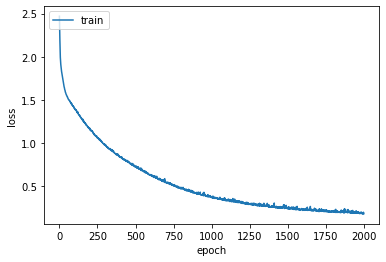

In [16]:
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [17]:
scores=model.evaluate(x_train, y_train)
print(model.metrics_names[1], scores[1]*100)

50/50 [==============================] - 0s 2ms/step
acc 92.00000023841858


In [20]:
# 一步预测
pred_count=50
seq_out=['g8','e8','e4','f8']  # 开头
pred_out=model.predict(x_train)

for i in range(pred_count):
    idx=np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])

print('one step prediction:', seq_out)

one step prediction: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [21]:
# 全曲预测
seq_in=['g8','e8','e4','f8']  # 开头
seq_out=seq_in
seq_in=[code2idx[item]/float(max_idx) for item in seq_in]

In [22]:
seq_in

[0.8461538461538461,
 0.6923076923076923,
 0.15384615384615385,
 0.7692307692307693]

In [23]:
for i in range(pred_count):
    sample_in=np.array(seq_in)
    sample_in=np.reshape(sample_in, (1, 4))
    pred_out=model.predict(sample_in)
    idx=np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx/float(max_idx))
    seq_in.pop(0)

In [25]:
print('full song prediction:', seq_out)

full song prediction: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [71]:
# 样本数，时间步长，特征个数的形态
x_train=np.reshape(x_train, (50, 4, 1))

In [32]:
# LSTM
model2=Sequential()
model2.add(LSTM(128, input_shape=(4,1)))
model2.add(Dense(oh_vec_size, activation='softmax'))

In [33]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history2=LossHistory()
history2.init()

In [35]:
model2.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history2])

Epoch 1/2000
 - 1s - loss: 2.4767 - acc: 0.0400
Epoch 2/2000
 - 0s - loss: 2.4353 - acc: 0.3400
Epoch 3/2000
 - 0s - loss: 2.3915 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3475 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.2975 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2341 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.1633 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.0754 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 1.9949 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9740 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9834 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9703 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9520 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9320 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9252 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9216 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9187 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9161 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9118 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9072 - acc: 0.3400
Epoch 21/2000
 - 0s - loss: 1

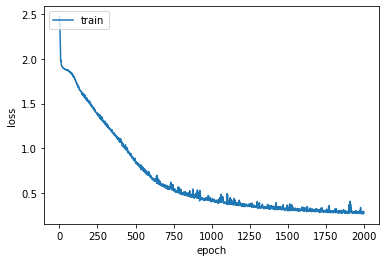

In [36]:
plt.plot(history2.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [38]:
scores2=model2.evaluate(x_train, y_train)
print(model2.metrics_names[1], scores2[1]*100)

50/50 [==============================] - 0s 470us/step
acc 87.99999928474426


In [39]:
# 一步预测
pred_count=50
seq_out=['g8','e8','e4','f8']  # 开头
pred_out=model2.predict(x_train)

for i in range(pred_count):
    idx=np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])

print('one step prediction:', seq_out)

one step prediction: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [41]:
# 全曲预测
seq_in=['g8','e8','e4','f8']  # 开头
seq_out=seq_in
seq_in=[code2idx[item]/float(max_idx) for item in seq_in]

for i in range(pred_count):
    sample_in=np.array(seq_in)
    sample_in=np.reshape(sample_in, (1, 4, 1))
    pred_out=model2.predict(sample_in)
    idx=np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx/float(max_idx))
    seq_in.pop(0)
    
print('full song prediction:', seq_out)

full song prediction: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'e8']


In [67]:
# stateful LSTM
model3=Sequential()
model3.add(LSTM(128, batch_input_shape=(1, 4, 1), stateful=True))
model3.add(Dense(oh_vec_size, activation='softmax'))

In [68]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
num_epochs=2000
history3=LossHistory()
history3.init()

In [72]:
for epoch_idx in range(num_epochs):
    print('epochs:', str(epoch_idx))
    model3.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history3])

model3.reset_states()

epochs: 0
Epoch 1/1
 - 2s - loss: 2.3456 - acc: 0.1400
epochs: 1
Epoch 1/1
 - 1s - loss: 2.0290 - acc: 0.3400
epochs: 2
Epoch 1/1
 - 1s - loss: 1.9684 - acc: 0.3400
epochs: 3
Epoch 1/1
 - 1s - loss: 1.9536 - acc: 0.3400
epochs: 4
Epoch 1/1
 - 1s - loss: 1.9438 - acc: 0.3400
epochs: 5
Epoch 1/1
 - 1s - loss: 1.9375 - acc: 0.3400
epochs: 6
Epoch 1/1
 - 1s - loss: 1.9327 - acc: 0.3400
epochs: 7
Epoch 1/1
 - 1s - loss: 1.9289 - acc: 0.3400
epochs: 8
Epoch 1/1
 - 1s - loss: 1.9258 - acc: 0.3400
epochs: 9
Epoch 1/1
 - 1s - loss: 1.9231 - acc: 0.3400
epochs: 10
Epoch 1/1
 - 1s - loss: 1.9208 - acc: 0.3400
epochs: 11
Epoch 1/1
 - 1s - loss: 1.9187 - acc: 0.3400
epochs: 12
Epoch 1/1
 - 1s - loss: 1.9168 - acc: 0.3400
epochs: 13
Epoch 1/1
 - 1s - loss: 1.9150 - acc: 0.3400
epochs: 14
Epoch 1/1
 - 1s - loss: 1.9132 - acc: 0.3400
epochs: 15
Epoch 1/1
 - 1s - loss: 1.9113 - acc: 0.3400
epochs: 16
Epoch 1/1
 - 1s - loss: 1.9088 - acc: 0.3400
epochs: 17
Epoch 1/1
 - 1s - loss: 1.9051 - acc: 0.3400
ep

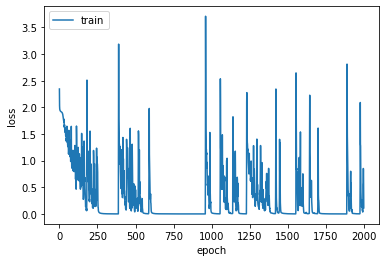

In [73]:
plt.plot(history3.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

In [74]:
scores3=model3.evaluate(x_train, y_train, batch_size=1)
print(model3.metrics_names[1], scores3[1]*100)
model3.reset_states()

50/50 [==============================] - 1s 11ms/step
acc 94.0


In [75]:
# 一步预测
pred_count=50
seq_out=['g8','e8','e4','f8']  # 开头
pred_out=model3.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx=np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])

model3.reset_states()
print('one step prediction:', seq_out)

one step prediction: ['g8', 'e8', 'e4', 'f8', 'e8', 'd4', 'c8', 'e8', 'e8', 'g8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [76]:
# 全曲预测
seq_in=['g8','e8','e4','f8']  # 开头
seq_out=seq_in
seq_in=[code2idx[item]/float(max_idx) for item in seq_in]

for i in range(pred_count):
    sample_in=np.array(seq_in)
    sample_in=np.reshape(sample_in, (1, 4, 1))
    pred_out=model3.predict(sample_in, batch_size=1)
    idx=np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx/float(max_idx))
    seq_in.pop(0)
    
print('full song prediction:', seq_out)

full song prediction: ['g8', 'e8', 'e4', 'f8', 'e8', 'd4', 'c8', 'e8', 'e8', 'g8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
